# Correlation Study

---

In [10]:
!pip3 install numpy
!pip3 install pandas
!pip3 install feature-engine


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [16]:
import os
current_dir = os.getcwd()
current_dir

'/home/john/dev'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [18]:
os.chdir('pa_heritage_housing')
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [19]:
current_dir = os.getcwd()
current_dir

'/home/john/dev/pa_heritage_housing'

# Load Data

In [32]:
import pandas as pd
df = pd.read_csv('outputs/datasets/collection/house_price_records.csv')
df.head(4)

,Unnamed: 0,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,0,856,854.0,3.0,No,706,GLQ,150,0.0,548,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1,1262,0.0,3.0,Gd,978,ALQ,284,0.0,460,...,80.0,0.0,0,8,6,1262,0.0,1976,1976,181500
2,2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,...,68.0,162.0,42,5,7,920,0.0,2001,2002,223500
3,3,961,0.0,0.0,No,216,ALQ,540,0.0,642,...,60.0,0.0,35,5,7,756,0.0,1915,1970,140000


---

# Correlation Study

In [33]:
columns_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
columns_with_missing_data
df[columns_with_missing_data].dtypes

GarageYrBlt    float64
LotFrontage    float64
dtype: object

In [34]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
df_ohe.head(3)

,Unnamed: 0,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,...,BsmtFinType1_BLQ,BsmtFinType1_LwQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_NotApplicable,GarageFinish_Fin,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,0,856,854.0,3.0,706,150,0.0,548,2003.0,1710,...,0,0,1,0,0,0,1,0,0,0
1,1,1262,0.0,3.0,978,284,0.0,460,1976.0,1262,...,0,0,1,0,0,0,0,1,0,0
2,2,920,866.0,3.0,486,434,0.0,608,2001.0,1786,...,0,0,1,0,0,0,1,0,0,0


We can use .corr() for both spearman and pearson methods, ordering the results by absolute value, to list correlations from strongest to weakest, irrespective of whether the correlation is direct or inverse.

In [37]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(20)
corr_spearman

OverallQual         0.809829
GrLivArea           0.731310
YearBuilt           0.652682
GarageArea          0.649379
TotalBsmtSF         0.602725
GarageYrBlt         0.593788
KitchenQual_TA     -0.581803
1stFlrSF            0.575408
YearRemodAdd        0.571159
KitchenQual_Gd      0.478583
OpenPorchSF         0.477561
GarageFinish_Unf   -0.469791
LotArea             0.456461
BsmtFinType1_GLQ    0.423896
MasVnrArea          0.415906
LotFrontage         0.409076
GarageFinish_Fin    0.374053
KitchenQual_Ex      0.346387
BsmtFinSF1          0.301871
2ndFlrSF            0.279845
Name: SalePrice, dtype: float64

In [38]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(20)
corr_pearson

OverallQual         0.790982
GrLivArea           0.708624
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
YearBuilt           0.522897
KitchenQual_TA     -0.519298
YearRemodAdd        0.507101
KitchenQual_Ex      0.504094
GarageYrBlt         0.486362
MasVnrArea          0.472614
BsmtFinType1_GLQ    0.400764
GarageFinish_Unf   -0.390642
BsmtFinSF1          0.386420
GarageFinish_Fin    0.376918
LotFrontage         0.351799
KitchenQual_Gd      0.321641
OpenPorchSF         0.315856
2ndFlrSF            0.312479
BsmtExposure_Gd     0.307298
Name: SalePrice, dtype: float64

### Create a set containing the top 5 features from the Pearson and Spearman correlation studies

In [39]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

In [40]:
vars_to_study = ['1stFlrSF','GarageArea','GrLivArea','OverallQual','TotalBsmtSF','YearBuilt']
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt']

In [55]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head(3)

,1stFlrSF,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,856,548,1710,7,856,2003,208500
1,1262,460,1262,6,1262,1976,181500
2,920,608,1786,7,920,2001,223500


---

### Variables Distribution by SalePrice

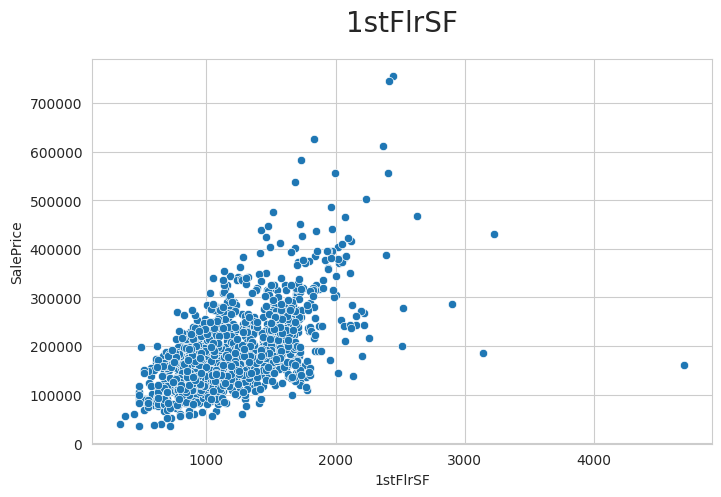

<Figure size 800x500 with 0 Axes>

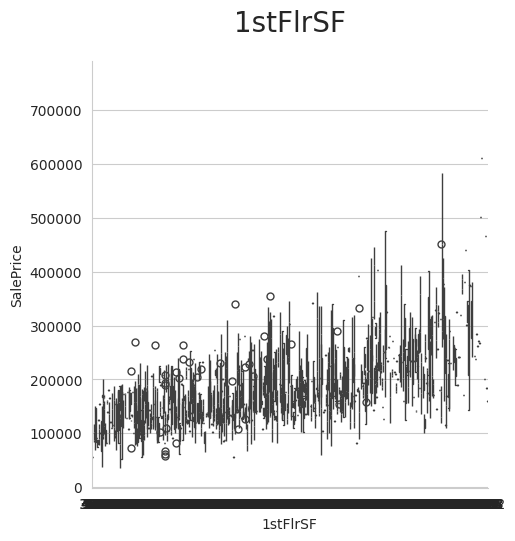

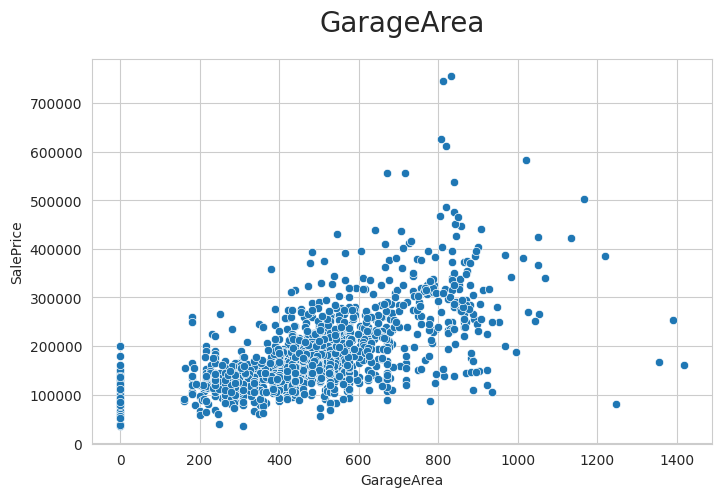

<Figure size 800x500 with 0 Axes>

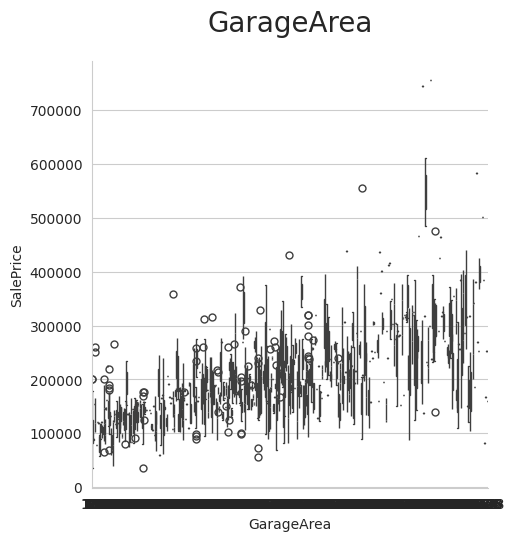

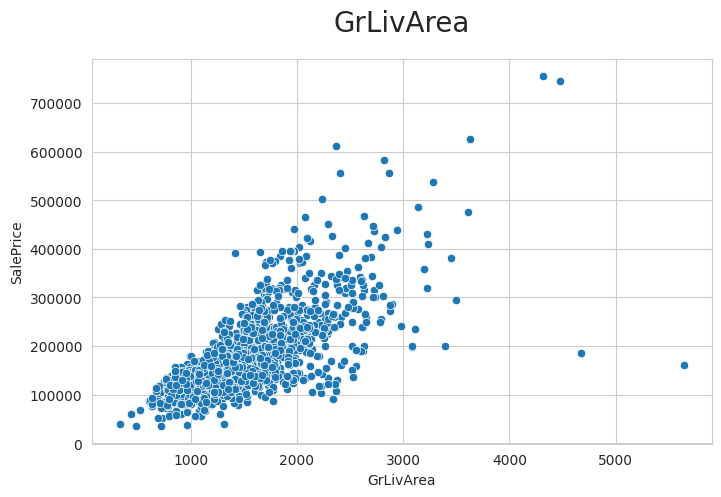

<Figure size 800x500 with 0 Axes>

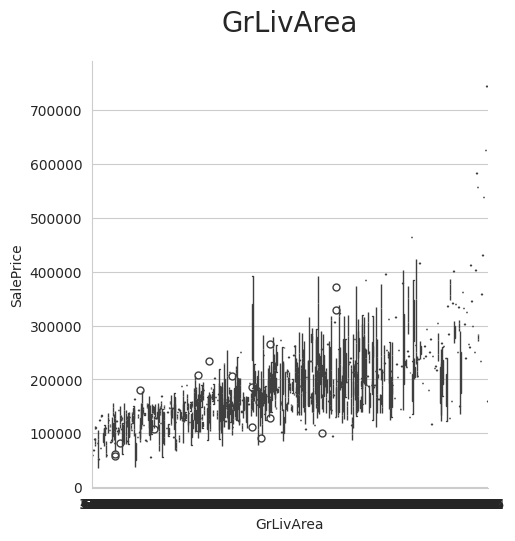

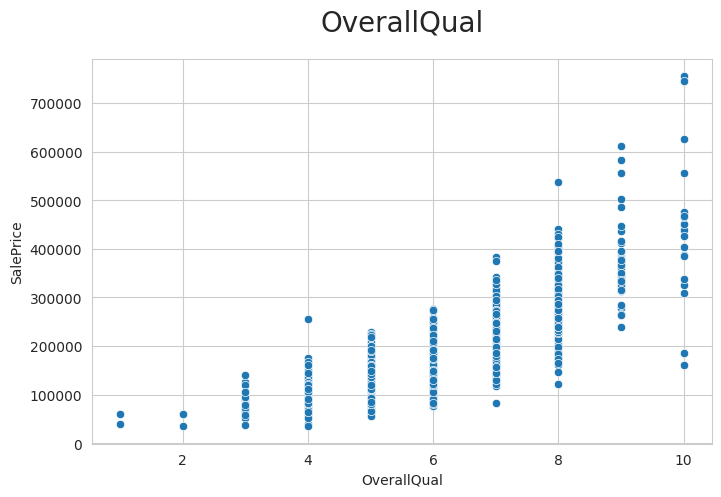

<Figure size 800x500 with 0 Axes>

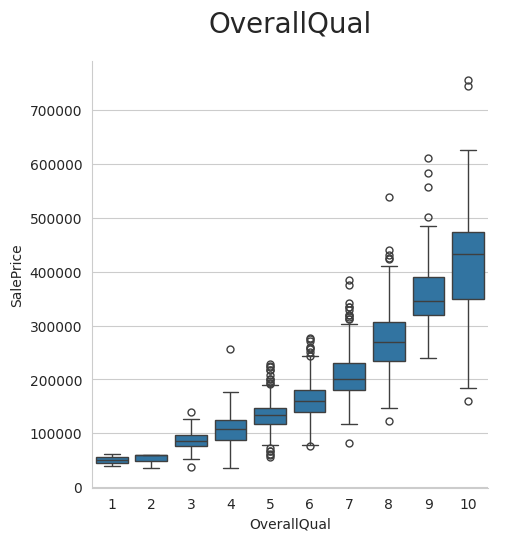

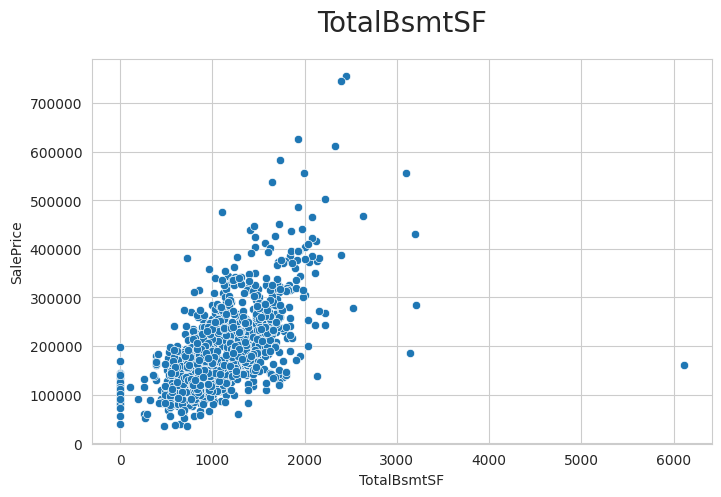

<Figure size 800x500 with 0 Axes>

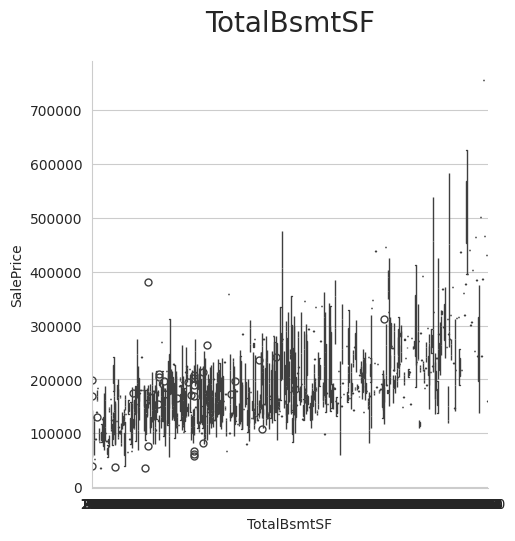

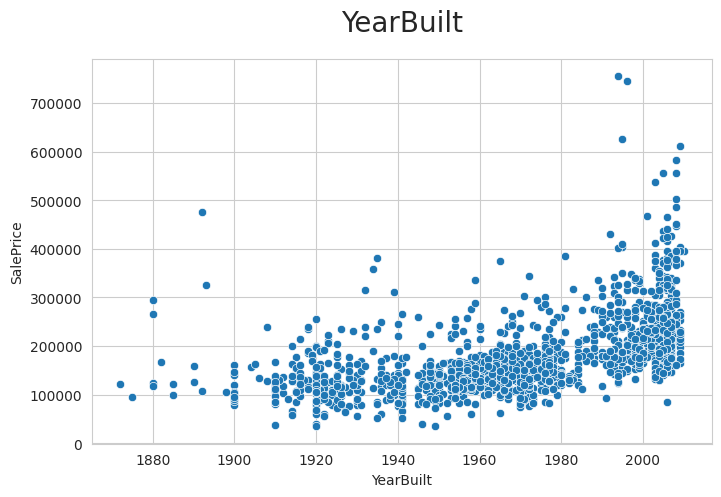

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col, y=df[target_var])
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()
    
target_var = 'SalePrice'
for col in vars_to_study:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col, target_var)
        plot_box(df_eda, col, target_var)
        print("\n\n")


NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block (2852421808.py, line 5)